In [15]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import random

## i create a dummy signal  

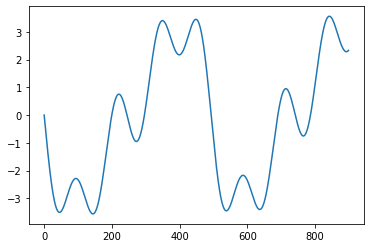

In [16]:
t=np.arange(10000)
omega=2*3.14*2
a=0.1*np.sin(omega*t)
a1=np.sin(omega*t)
b=3*np.sin(2*omega*t)
b1=np.sin(2*omega*t)
c=np.sin(4*omega*t)
d=5*np.sin(8*omega*t)
d1=np.sin(8*omega*t)
e=a+b+c+d/4
plt.plot(e[0:900])
z=np.random.uniform(-0.5,0.5,900).reshape(1,900)


In [17]:
m=e[0:900]+z
m.reshape(1,-1)

array([[-0.2899723 , -0.57784584, -0.6586538 , -0.71456718, -0.53111683,
        -0.87826523, -1.02676269, -0.84422727, -1.4687178 , -1.46387905,
        -1.14640016, -0.90365705, -1.84605254, -1.21153751, -1.82993057,
        -2.20049609, -1.70861632, -2.39197265, -2.62438202, -1.89761667,
        -2.47926062, -2.1311351 , -2.71586336, -2.65800988, -2.54031794,
        -2.76588964, -2.92660684, -3.38048625, -3.33367056, -2.84719798,
        -2.98138981, -3.21070653, -3.45295899, -3.07154118, -2.83533823,
        -3.05149141, -2.86846411, -3.36902574, -3.47995096, -3.06266693,
        -3.07315847, -3.40381656, -3.3688486 , -3.80630751, -4.00050372,
        -3.33780788, -3.29414789, -3.9604475 , -3.95809851, -3.720829  ,
        -3.41091822, -3.13934404, -3.26733865, -3.91111004, -3.72608865,
        -3.59277391, -3.77548013, -2.82204566, -3.48761964, -3.60032556,
        -3.11340577, -3.19818894, -3.50817751, -2.78380004, -3.22297172,
        -3.0514909 , -3.1690971 , -2.91915616, -2.6

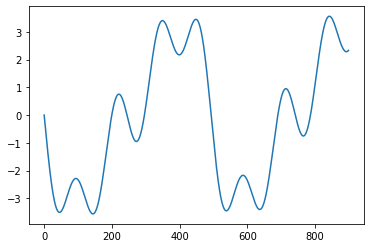

In [18]:

plt.plot(e[0:900])
plt.show()

In [19]:
kk=pd.DataFrame()


In [20]:
kk['a']=a1[0:900]
kk['b']=b1[0:900]
kk['c']=c[0:900]
kk['d']=d1[0:900]
kk['sigint']=m[0:900].reshape(-1,1)

In [21]:
kk.head()

,a,b,c,d,sigint
0,0.000000,0.000000,0.000000,0.000000,-0.289972
1,-0.006371,-0.012741,-0.025480,-0.050943,-0.577846
2,-0.012741,-0.025480,-0.050943,-0.101753,-0.658654
3,-0.019111,-0.038214,-0.076373,-0.152300,-0.714567
4,-0.025480,-0.050943,-0.101753,-0.202451,-0.531117


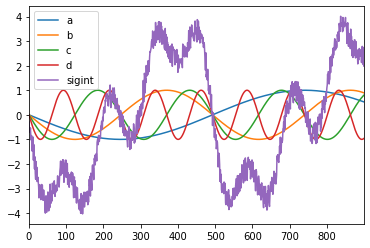

In [22]:
kk.plot()

In [26]:
from sklearn.linear_model import LinearRegression
X=kk[["a","b","c","d"]]
y=kk[["sigint"]]
X.head()
y.head()
reg = LinearRegression().fit(X, y)
reg.score(X,y)

0.9852518521904758

In [27]:
pred=reg.predict(X)

In [28]:
kk["Predicted"]=pred

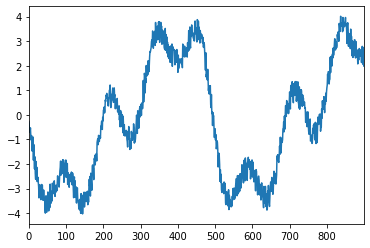

In [29]:
kk["sigint"].plot()

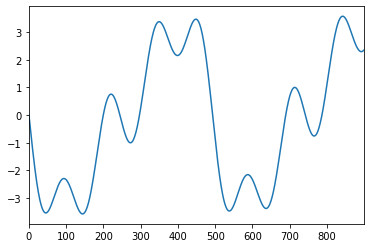

In [30]:
kk["Predicted"].plot()

In [31]:
reg.coef_

array([[0.12412582, 2.99521059, 1.02202689, 1.26271616]])

___What i am trying to do is create a general formula for a sound signal of an instrument for its one note by using collection of sin wave harmonics___
What i have done:
* created a signal using different amplitudes for sinwaves whose frequecies increase in by 2 every time 
* i have used f 2f 4f and 8f sinwaves with varrying amplitude to generate a wave. I add them and divide resultant vector by 4
* Then i add noise to the resultant wave
* so this somehow represents how a real world arbitary sound wave would look

* now i take a table with vectors of each frequency of sinwave 
* i append the input wave to this 

* Apply least squares linear regression to this to calculate the weights

Observations till  now :

* we get a good waveform which is similar to the input waveform

## Most Important Observation here is that the we obtain a general formula for the input noisy wave and can now generate a wave which is perfect with no noise